In [79]:
#Importing required libraries 
import os
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



path= r"C:\Users\Lenovo\Desktop\Datasets_for_ML_-_Regression"
os.chdir(path)
os.listdir(path)
train=pd.read_csv("train.csv")

In [80]:
train.shape

(8523, 12)

In [81]:
len(train)

8523

In [82]:
Null_value =train.isnull().sum()
Null_value

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [83]:
Null_value =(train.isnull().sum()/len(train))*100
Null_value

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [84]:
train=train.dropna()

In [85]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [138]:
X=train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
Y=train[['Item_Outlet_Sales']]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,1999,1.0,1,1.0
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2009,1.0,3,2.0
2,FDN15,17.50,1,0.016760,Meat,141.6180,OUT049,1999,1.0,1,1.0
3,FDX07,19.20,2,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,3,NaN
4,NCD19,8.93,1,0.000000,Household,53.8614,OUT013,1987,3.0,3,1.0


In [140]:
X = X.loc[:,['Outlet_Type']]
Y = Y.loc[:,'Item_Outlet_Sales']

In [141]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
len(x_train)

3720

In [142]:
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [143]:
print("a0 = ",lm.intercept_)
print("Coeff = ",lm.coef_)

a0 =  2689.7835433593195
Coeff =  [-340.37156263]


In [144]:
y_pred = model.predict(x_test)
y_pred

array([2349.41198073, 2009.04041811, 2009.04041811, 2009.04041811,
       2349.41198073, 2349.41198073, 2349.41198073, 2349.41198073,
       2349.41198073, 2349.41198073, 2349.41198073, 2349.41198073,
       2349.41198073, 2349.41198073, 2349.41198073, 2349.41198073,
       2349.41198073, 2009.04041811, 2349.41198073, 2349.41198073,
       2349.41198073, 2349.41198073, 2349.41198073, 2009.04041811,
       2349.41198073, 2349.41198073, 2349.41198073, 2349.41198073,
       2009.04041811, 2349.41198073, 2009.04041811, 2349.41198073,
       2349.41198073, 2349.41198073, 2009.04041811, 2349.41198073,
       2349.41198073, 2349.41198073, 2009.04041811, 2349.41198073,
       2349.41198073, 2349.41198073, 2349.41198073, 2349.41198073,
       2349.41198073, 2349.41198073, 2349.41198073, 2349.41198073,
       2009.04041811, 2349.41198073, 2009.04041811, 2009.04041811,
       2349.41198073, 2349.41198073, 2349.41198073, 2349.41198073,
       2349.41198073, 2349.41198073, 2009.04041811, 2349.41198

In [145]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse)
print(r2_score(y_test,y_pred))

1517.5013777643362
0.008055532428108525


---------------------------------------------------------------

RMSE=1107.9855
#R^2=0.471192
After taking Attributes = Item_Weight','Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'

----------------------------------------------------------------------

RMSE=1106.9855
#R^2=0.472499
After taking Attributes ='Item_Fat_Content','Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'

--------------------------------------------------------

#RMSE=1106.4718
#R^2=0.4726371

After taking Attributes ='Item_Visibility','Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'

--------------------------------------------------

#RMSE=1105.3867338498385
#R^2=0.4736705539551995

After taking Attributes ='Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'

---------------------------------------------------------------------------------------------

#RMSE=1515.564847944303
#R^2=0.010585618252970774

After taking Attributes ='Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type'

-------------------------------------------------------------------

#RMSE=1516.9009626453737
#R^2=0.00884032332298057

After taking Attributes ='Outlet_Size','Outlet_Location_Type','Outlet_Type'

____________________________________________________________

#RMSE=1517.9309539473982
#R^2=0.00749385118403445

After taking Attributes ='Outlet_Location_Type' and 'Outlet_Type'

__________________________________________________________________________________________

#RMSE=1517.5013777643362

#R^2=0.008055532428108525

After taking Attributes only 'Outlet_Type'

# __________________________________________________________________________________________________________________________

#Conclusion= After dropping Nan values and  taking below  Attributes ('Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type')
Getting the maximum r square value that is = 0.4736705539551995

# Lasso Regression

In [86]:
X=train[['Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
Y=train[['Item_Outlet_Sales']]
X['Outlet_Location_Type']=X['Outlet_Location_Type'].map({'Tier 1':1,'Tier 3':3,'Tier 2':2})

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
X['Outlet_Type']=X['Outlet_Type'].map({'Supermarket Type1':1,'Supermarket Type2':2})
X.head()

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,249.8092,1999,Medium,1,1
1,48.2692,2009,Medium,3,2
2,141.6180,1999,Medium,1,1
4,53.8614,1987,High,3,1
5,51.4008,2009,Medium,3,2


In [90]:
X['Outlet_Size']=X['Outlet_Size'].map({'Medium':1,'High':3,'Small':2})

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,r2_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#create a ridge regression object object
alpha_list = [0.001,0.01,0.05,0.5,5,10]

for i in alpha_list:
    lasso_reg = Lasso(alpha = i, normalize=True)
    lasso_reg.fit(X_train, Y_train)
    y_pred2 = lasso_reg.predict(X_test)
    print("R-Squre {} for alpha={}" .format(r2_score(Y_test, y_pred2), i))

R-Squre 0.47366991379731527 for alpha=0.001
R-Squre 0.4736565234487572 for alpha=0.01
R-Squre 0.4734314627712567 for alpha=0.05
R-Squre 0.4722386110050305 for alpha=0.5
R-Squre 0.4164341261940825 for alpha=5
R-Squre 0.28712677760097116 for alpha=10


NOTE:
When alpha 0.001 the R-Squre value is maximum.
In lasso if we increase the R-square value is decreasing

In [93]:
# Fit the model using alpha 0.001

lasso_reg = Lasso(alpha = 0.001, normalize=True)
lasso_reg.fit(X_train, Y_train)
y_pred2 = lasso_reg.predict(X_test)
print("R-Squre: ",r2_score(Y_test, y_pred2))

R-Squre:  0.47366991379731527


In [94]:
lasso_reg.coef_

array([  16.17070223,    7.46435719,  -89.8230136 ,   85.6101676 ,
       -647.16543741])

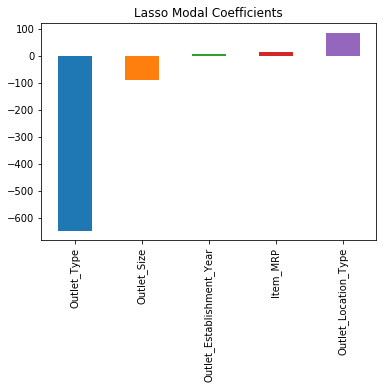

In [96]:
#Ploting the magnitude of Coefficients

predictors = X_train.columns

coef = pd.Series([16.17070223,7.46435719,-89.8230136 ,85.6101676,-647.16543741],
              predictors).sort_values()

coef.plot(kind='bar', title='Lasso Modal Coefficients')
plt.show()

# Regularzation Technique   ( Ridge Regression)

In [104]:
X=train[['Item_MRP','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
Y=train[['Item_Outlet_Sales']]
X['Outlet_Location_Type']=X['Outlet_Location_Type'].map({'Tier 1':1,'Tier 3':3,'Tier 2':2})
X['Outlet_Type']=X['Outlet_Type'].map({'Supermarket Type1':1,'Supermarket Type2':2})
X['Outlet_Size']=X['Outlet_Size'].map({'Medium':1,'High':3,'Small':2})

In [103]:
import warnings
warnings.filterwarnings("ignore")

In [105]:
from sklearn.linear_model import Ridge

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#create a ridge regression object object
alpha_list = [0.01,0.05,0.5,5,10]

for i in alpha_list:
    ridge_reg = Ridge(alpha = i, normalize=True)
    ridge_reg.fit(X_train, Y_train)
    y_pred1 = ridge_reg.predict(X_test)
    print("R-Squre {} for alpha={}" .format(r2_score(Y_test, y_pred1), i))

R-Squre 0.4732905960556679 for alpha=0.01
R-Squre 0.4707603130503938 for alpha=0.05
R-Squre 0.41178133230479563 for alpha=0.5
R-Squre 0.139459344084367 for alpha=5
R-Squre 0.07890037376425563 for alpha=10


Note:
for Alpha 0.01 above model is giving more R-Squre nearly 47%
While increasing the Alpha R-square value is decresing.

In [107]:
# Fit the model using alpha 0.01

ridge_reg = Ridge(alpha = 0.01, normalize=True)
ridge_reg.fit(X_train, Y_train)
y_pred1 = ridge_reg.predict(X_test)
print("R-Squre: ",r2_score(Y_test, y_pred1))
print(ridge_reg.coef_)

R-Squre:  0.4732905960556679
[[  16.0093264     6.98822902  -69.50723981   65.74931759 -590.28726035]]


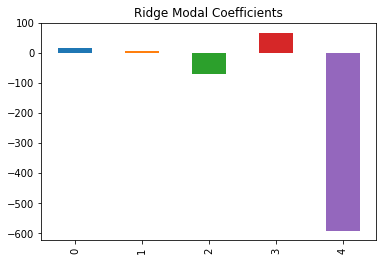

In [109]:
#checking the magnitude of coefficients

predictors = X_train.columns

coef = pd.Series([16.0093264, 6.98822902,-69.50723981  ,65.74931759, -590.28726035])

coef.plot(kind='bar', title='Ridge Modal Coefficients')
plt.show()